# HOW TO PLOT A SPHERE USING PYPLOT

After having successfully managed to plot a Dodecahedron and a Cube (see files in the same folder) I am now tackling a sphere. I have chosen this since it presents the challenge of not having any "face" so we cannot use the same method as the previous two solids, but we need to resort to equations and linear space. 

A sphere all of the same colour won't be easy to see on a graph, so I think I will have to try different graphical representation of the solid, which also could be interesting.

To do this, I am mainly drawing from the documentation of mplot3d. 

A sphere centered in 0,0,0 would have equations x^2 + y^2 + z^2 = r^2. 
To keep things simple I have chosen r = 1 (unit sphere). 
Therefore I think I need to set up 2 independent variables x and y and create the surface plot z = ±sqrt(1-x^2-y^2).
This is really 2 separate functions, so I think I will have to plot each one of them and join them up.
Let us start aiming for half a sphere, using z = sqrt(1-x^2-y^2).

In [8]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
z = np.sqrt(1-x**2 -y**2)

/Users/canzonettaclaudio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


Mmm. That obviously does not work. I thinks this is because I have used all points in the xy plane but there are a number of points, like the point (-1,-1) that do not belong to the sphere. These result in negatives under the sqrt which throws an error (or it gives you immaginary solutions, if treated differently). 

I need to try a different approach. I would like to find my own solution to this without looking at online example, so I thought of trying to plot a series of concentric circles along the z axis. 

Let us start with one circle only.
I can define the circle radius as r = 1, which will then become later a variable in function of z (different radius of circle according to the position along the height). 
In order to plot a circle, I need ordered pairs of coordinates (x,y) which need to obey the circle equation. 
I introduce an angle variable alpha and create a series of values that go from 0 to 360 degrees. 


In [30]:
r = 1
alpha = np.linspace(0, 2*np.pi, 50)
print(alpha)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


Now we can define x and y in terms of alhpa and r. 

In [31]:
x = r*np.cos(alpha)
y = r*np.sin(alpha)
print(x,y)

[ 1.          0.99179001  0.96729486  0.92691676  0.8713187   0.80141362
  0.71834935  0.6234898   0.51839257  0.40478334  0.28452759  0.1595999
  0.03205158 -0.09602303 -0.22252093 -0.34536505 -0.46253829 -0.57211666
 -0.67230089 -0.76144596 -0.8380881  -0.90096887 -0.94905575 -0.98155916
 -0.99794539 -0.99794539 -0.98155916 -0.94905575 -0.90096887 -0.8380881
 -0.76144596 -0.67230089 -0.57211666 -0.46253829 -0.34536505 -0.22252093
 -0.09602303  0.03205158  0.1595999   0.28452759  0.40478334  0.51839257
  0.6234898   0.71834935  0.80141362  0.8713187   0.92691676  0.96729486
  0.99179001  1.        ] [ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  

This seems to work. Let us plot this circle on the xy plane first. 

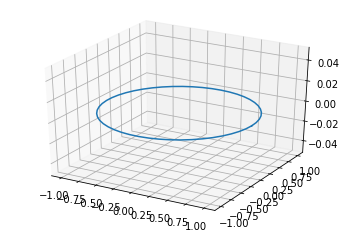

In [32]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
plt.plot(x,y)

This is good. Now let us try to change r and see if the definitions hold. For example, let us try when r = 0: 

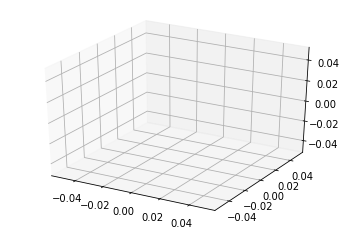

In [34]:
r = 0
alpha = np.linspace(0, 2*np.pi, 50)
x = r*np.cos(alpha)
y = r*np.sin(alpha)
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
plt.plot(x,y)

I was hoping to see a dot, but it makes sense that a zero would give zero points. Let us try something quite small, close to 0: 

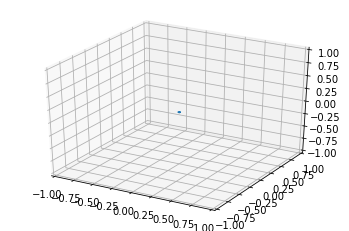

In [40]:
r = 0.01
alpha = np.linspace(0, 2*np.pi, 50)
x = r*np.cos(alpha)
y = r*np.sin(alpha)
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
plt.plot(x,y)

This is good! I toggled this from 0.0000001 to 0.01 and the dot in this resolution can be seen starting from 0.001, so we do not need a lot of points along the z-axis to do this.
Let us now set z as a range from -1 to 1 (since we want to plot a unit sphere)

In [43]:
z = np.linspace(-1,1,10)
print(z)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


Now the difficult part of setting up r as a function of z. We can imagine a right triangle between the height z (cos theta), the radius r of the circle at height z (sin theta) and the vector from origin to a point on the circumference of the circle at height z (hypotenuse). We have z and we want to find r. If both are in terms of the same angle theta, my temptation would be to set r = sin(theta) = sin(arcos(z). Let us try. 

In [48]:
r = np.sin(np.arccos(z))
print(r)

[1.22464680e-16 6.28539361e-01 8.31479419e-01 9.42809042e-01
 9.93807990e-01 9.93807990e-01 9.42809042e-01 8.31479419e-01
 6.28539361e-01 0.00000000e+00]


Now I will keep going with my train of thought and try to plot a series of concentric circle to see visually if this works. Then I think I will have to combine all of these points into one scatter plot or something like that to create a surface. 

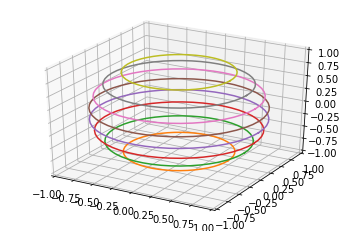

In [51]:
alpha = np.linspace(0, 2*np.pi, 50)
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
for i in range(len(r)):
    x = r[i]*np.cos(alpha)
    y = r[i]*np.sin(alpha)
    height = z[i]
    plt.plot(x,y,height)
plt.show()

Great! Now I can try to put all dots in a scatter and see if it works.

In [68]:
x = []
y = []
height = []
for i in range(len(r)):
    x.extend(r[i]*np.cos(alpha))
    y.extend(r[i]*np.sin(alpha))
    height.extend(np.repeat(z[i],len(alpha)))
len(x) == len(y)== len(height)

True

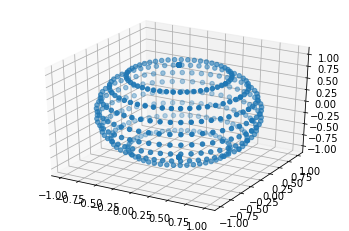

In [74]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.scatter(x,y,height)

Very well. Now let us see if we can convert this into a surface easily or not. 

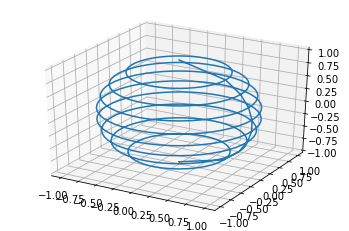

In [77]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot(x,y,height)

OK, after plotting successfully the three renders above, I discovered that this system does not work for surface plots or wiremesh plots: these types only accept 2D arrays for each of the three dimensions. 
the story complicates!
I think what I have to do is to change slightly the iteration above, so instead of having a very long list of numbers I have a list of lists, with each circle corresponding to one of the inner lists.
Let us try: 

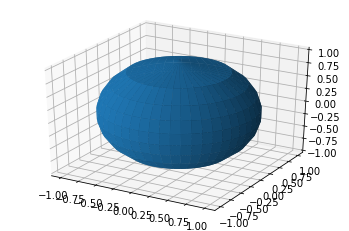

In [110]:
x = np.zeros([50,50])
y = np.zeros([50,50])
height = np.zeros([50,50])
for i in range(len(r)):
    x[i] = r[i]*np.cos(alpha)
    y[i] = r[i]*np.sin(alpha)
    height[i] = np.repeat(z[i],len(alpha))
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_surface(x,y,height)


Bingo! Let us try the wireframe display:

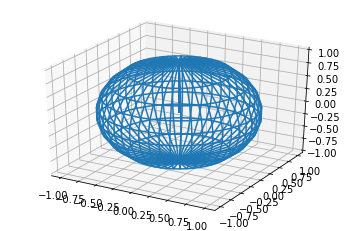

In [111]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.plot_wireframe(x,y,height)

very pretty! I am quite satisfied with the result and of course it would be more accurate by increasing the values along z, but I did not want to turn this into a really cpu intensive exercise. 

Let us see if I can find online a simpler way to obtain this. 

In the mplot3d tutorial documentation I found this:

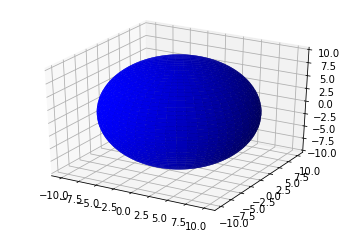

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

This is very compact code and it works very well. Let us try to break it down to understand it. 
u is the values of an angle between 0 and 2pi (same as my alpha above). 
v is the values of an angle between 0 and pi.
x and y and z use the function np.outer(): this is the product of 2 vectors. 
so if np.cos(u) is the series of cos values between 0 and 2pi, then x is an array in 2D with the values of cosu and sinu in each sub list:

In [113]:
print(x)

[[0.00000000e+00 3.17279335e-01 6.34239197e-01 ... 6.34239197e-01
  3.17279335e-01 1.22464680e-15]
 [0.00000000e+00 3.16640549e-01 6.32962268e-01 ... 6.32962268e-01
  3.16640549e-01 1.22218119e-15]
 [0.00000000e+00 3.14726763e-01 6.29136624e-01 ... 6.29136624e-01
  3.14726763e-01 1.21479429e-15]
 ...
 [0.00000000e+00 3.14726763e-01 6.29136624e-01 ... 6.29136624e-01
  3.14726763e-01 1.21479429e-15]
 [0.00000000e+00 3.16640549e-01 6.32962268e-01 ... 6.32962268e-01
  3.16640549e-01 1.22218119e-15]
 [0.00000000e+00 3.17279335e-01 6.34239197e-01 ... 6.34239197e-01
  3.17279335e-01 1.22464680e-15]]


In [114]:
len(x)

100

In [115]:
len(x[0])

100

This has basically obtained already the list of lists in the correct format with just one simple function, instead of creating lots of iterations as I have done. 
I am not exactly sure why this is using u and v though, instead of going full circle for both sin and cos.
My understanding is that the programmer is trying to create a circle and rotating this circle around an horizontal axis to create a sphere: this is why the plane xy is calculated as a sin of a vertical angle v and z is the cos of that vertical angle. neat! 